# Hands on Data Science

---
Topics

*   1. Data Preparation
*   2. Exploratory Data Anaylsis
*   3. Data Visualization
*   4. Basic ML / Predictive Analysis
*   5. Summarize Findings / Insights

#1. Data Preparation



In [55]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import io
from google.colab import files

In [56]:
# Load dataset Netflix
uploaded = files.upload()

Saving netflix.csv to netflix (3).csv


In [57]:
# Read the uploaded CSV into pandas DataFrame
filename = list(uploaded.keys())[0]
netflix = pd.read_csv(io.BytesIO(uploaded[filename]))

In [58]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [41]:
netflix.tail()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [42]:
# Check how many missing values are in each column
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [43]:
netflix.duplicated().sum()

np.int64(0)

#2. Exploratory Data Anaylsis

In [44]:
#Descriptive statistics
#netflix.describe()            # numerical columns
netflix.describe(include='all')  # all columns, including categorical

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s8786,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [45]:
#Counts and basic aggregations
type_counts = netflix['type'].value_counts()
type_counts


,count
type,
Movie,6126
TV Show,2664


In [46]:
#Number of releases by year descending
release_year_counts = netflix['release_year'].value_counts().sort_index(ascending=False).head(10)
release_year_counts

,count
release_year,
2021,592
2020,953
2019,1030
2018,1146
2017,1030
2016,901
2015,555
2014,352
2013,286


In [47]:
# Year with the most titles
most_titles_year = release_year_counts.idxmax()
most_titles_count = release_year_counts.max()
most_titles_year, most_titles_count

(np.int64(2018), 1146)

In [48]:
#Count of movies by country
top_countries = netflix['country'].value_counts().head(10)
top_countries

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


#3. Data Visualization

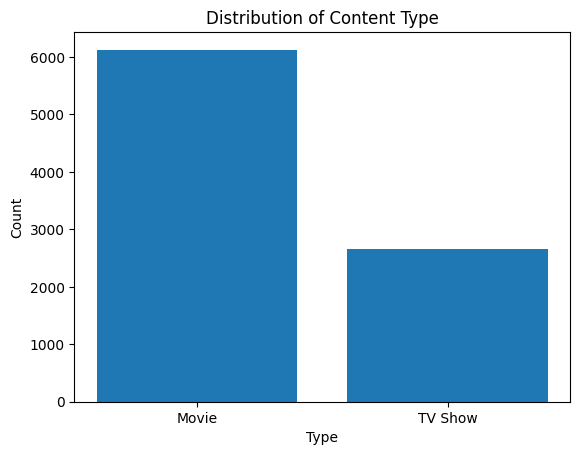

In [49]:
# Count the number of each type
type_counts = netflix['type'].value_counts()

# Basic bar chart
plt.bar(type_counts.index, type_counts.values)
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

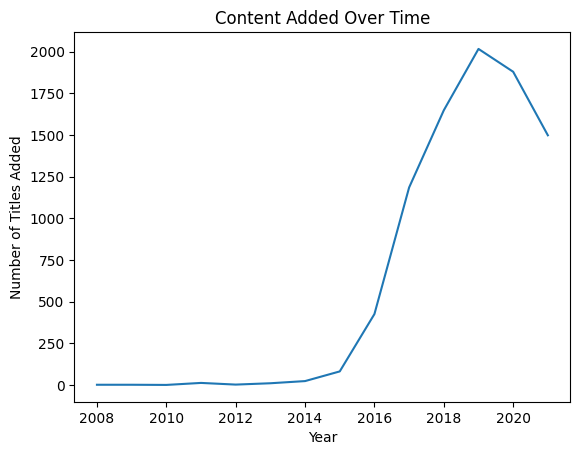

In [50]:
# Make sure 'date_added' is a datetime type
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

# Count number of titles added per year
added_per_year = netflix['date_added'].dt.year.value_counts().sort_index()

# Basic line plot
plt.plot(added_per_year.index, added_per_year.values)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

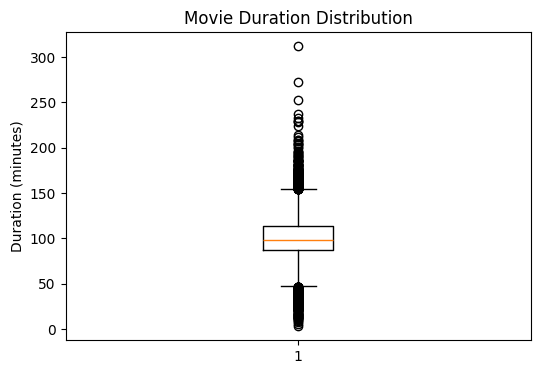

In [51]:
# Keep only movies
movies = netflix[netflix['type'] == 'Movie'].copy()

# Extract numeric duration in minutes
# Remove ' min' and convert to int
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(int)

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(movies['duration_min'])
plt.title('Movie Duration Distribution')
plt.ylabel('Duration (minutes)')
plt.show()


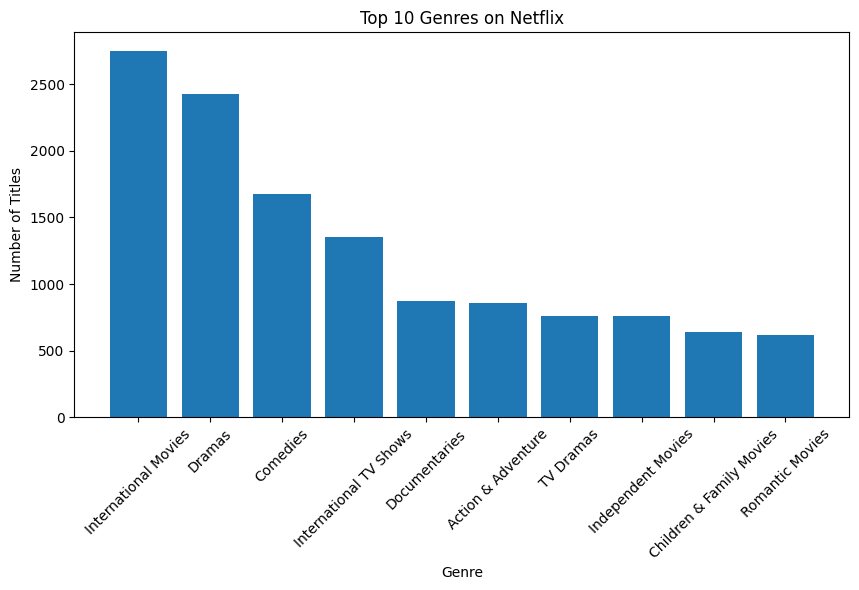

In [52]:
# Drop missing values in 'listed_in'
genres_series = netflix['listed_in'].dropna()

# Split genres into separate rows
genres_expanded = genres_series.str.split(',').explode().str.strip()

# Count frequency of each genre
top_genres = genres_expanded.value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
plt.bar(top_genres.index, top_genres.values)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

#4. Basic ML / Predictive Analysis

In [61]:
# Use only numeric features
X = netflix[['duration', 'release_year']]

X = netflix[['duration', 'release_year']].copy()

# Modify types
X['duration'] = X['duration'].str.replace(' min','')
X['duration'] = X['duration'].str.split(' ').str[0]
X['duration'] = pd.to_numeric(X['duration'], errors='coerce').fillna(0)


In [62]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9965870307167235

# 5. Summarize Findings / Insights

We loaded and examined real data - Netflix's catalog

We cleaned and checked our data - no missing values or duplicates

We explored patterns - found that:

* 70% of content is movies

* 2018 was the peak year

* US produces most content

We visualized our findings by making charts that tell stories

We touched on machine learning and saw how predictions work

